# Linear Congruential Random Number Generators

>A **linear congruential generator** (**LCG**) is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear function. The method represents one of the oldest and best-known pseudorandom number generator algorithms. The theory behind them is relatively easy to understand, and they are easily implemented and fast, especially on computer hardware which can provide modular arithmetic by storage-bit truncation.
>
>The generator is defined by the recurrence relation:
>$$X_{n+1} = \left( a X_n + c \right)\bmod m$$
>where $X$ is the sequence of pseudo-random values, and
>- $m,\, 0\lt m$ is the "modulus",
>- $a,\,0 \lt a \lt  m$ is the "multiplier",
>- $c,\,0 \le c \lt  m$ is the "increment",
>- $X_0,\,0 \le X_0 \lt  m$ is the "seed" or "start value",
>These are integer constants that specify the generator.
>If $c=0$, the generator is often called a "multiplicative congruential generator" (MCG), or *Lehmer RNG*.
>If $c≠0$, the method is called a "mixed congruential generator".
>
>[[Wikipedia](https://en.wikipedia.org/wiki/Linear_congruential_generator)]

### Tasks

- Create an LCG with your Student ID as the modulus $m$, and suitable random values for $a, c$, and the *seed*. (See starter code below.)
- Use Decision Tress (DTs) from the `scikit-learn` library to assess the quality of your chosen PRNG. (If it is easy to predict the next digits then it is less random.)
    - Select 3 hyper-parameters and study their effect.

Explain your reasoning, and justify any choices of the hyperparameters (and/or run experiments to find the optimal ones).

Evaluate your models, and use visualisation to show the trees and any relevant plots.

Write a conclusion that summarises your findings, and makes recommendations.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from math import log

## Initialisation of the LCG parameters

Assign suitable values to the fllowing variables.

In [ ]:
MODULUS = 123456789

In [ ]:
A = 101
C = 13
SEED = 321

### Base $b$ representation of numbers

In [ ]:
def base_b(n, b):
    """ Get a list representing the number n written in base 'b' """
    bitlength = 1+int(log(MODULUS)/log(b))
    r = []
    for _ in range(bitlength):
        r.insert(0, n%b)
        n //= b
    return r

In [ ]:
base_b(11,3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]

## LCG

In [ ]:
def lcg(seed, modulus, a, c):
    """ Linear congruential generator: 𝑋_{𝑛+1} = (𝑎𝑋_𝑛+𝑐) mod 𝑚 """
    while True:
        seed = (a * seed + c) % modulus
        yield seed

In [ ]:
generator = lcg(SEED, MODULUS, A, C)

## Data generation

In [ ]:
stream = [next(generator) for _ in range(10_000)]

In [ ]:
def get_features(stream, base):
    ''' Repalce each random number from 'stream' by a vector of its base b digits '''
    return [base_b(n, base) for n in stream]

In [ ]:
data = get_features(stream, base=3)

In [ ]:
stream[0], data[0]

(32434, [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1])

In [ ]:
X = data[:-1]
y = data[1:]
len(X), len(y)

(9999, 9999)

In [ ]:
X[0], y[0]

([0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1],
 [0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test) # Regenerate the predictions
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

accuracies_per_digit = [accuracy_score(y_test_np[:, i], y_pred_np[:, i]) for i in range(y_test_np.shape[1])]

print("Accuracy per digit position:")
for i, acc in enumerate(accuracies_per_digit):
    print(f"Digit position {i}: {acc:.4f}")

average_accuracy = np.mean(accuracies_per_digit)
print(f"\nAverage accuracy across all digit positions: {average_accuracy:.4f}")

Accuracy per digit position:
Digit position 0: 0.3476
Digit position 1: 0.3248
Digit position 2: 0.3460
Digit position 3: 0.3408
Digit position 4: 0.3240
Digit position 5: 0.3404
Digit position 6: 0.3372
Digit position 7: 0.3352
Digit position 8: 0.3372
Digit position 9: 0.3332
Digit position 10: 0.3316
Digit position 11: 0.3348
Digit position 12: 0.3512
Digit position 13: 0.3432
Digit position 14: 0.3372
Digit position 15: 1.0000
Digit position 16: 1.0000

Average accuracy across all digit positions: 0.4156


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import itertools

# Define hyperparameter values to test
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 3, 5]
criterion_values = ['gini', 'entropy']

# Store results
tuning_results = []

# Iterate through hyperparameter combinations
for max_depth, min_samples_split, min_samples_leaf, criterion in itertools.product(
    max_depth_values, min_samples_split_values, min_samples_leaf_values, criterion_values
):
    print(f"Testing: max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, criterion={criterion}")

    # Instantiate and train the model
    dtc_tuned = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=0 # for reproducibility
    )
    dtc_tuned.fit(X_train, y_train)

    # Make predictions
    y_pred_tuned = dtc_tuned.predict(X_test)

    # Calculate average accuracy
    y_test_np = np.array(y_test)
    y_pred_tuned_np = np.array(y_pred_tuned)

    accuracies_per_digit_tuned = [
        accuracy_score(y_test_np[:, i], y_pred_tuned_np[:, i])
        for i in range(y_test_np.shape[1])
    ]
    average_accuracy_tuned = np.mean(accuracies_per_digit_tuned)

    # Store results
    tuning_results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'average_accuracy': average_accuracy_tuned
    })
    print(f"Average Accuracy: {average_accuracy_tuned:.4f}\n")

# Find the best hyperparameters
best_result = max(tuning_results, key=lambda x: x['average_accuracy'])

print("Best Hyperparameters:")
print(best_result)

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion=gini
Average Accuracy: 0.4155

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion=entropy
Average Accuracy: 0.4164

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=gini
Average Accuracy: 0.4134

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy
Average Accuracy: 0.4161

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=5, criterion=gini
Average Accuracy: 0.4128

Testing: max_depth=None, min_samples_split=2, min_samples_leaf=5, criterion=entropy
Average Accuracy: 0.4137

Testing: max_depth=None, min_samples_split=5, min_samples_leaf=1, criterion=gini
Average Accuracy: 0.4155

Testing: max_depth=None, min_samples_split=5, min_samples_leaf=1, criterion=entropy
Average Accuracy: 0.4171

Testing: max_depth=None, min_samples_split=5, min_samples_leaf=3, criterion=gini
Average Accuracy: 0.4134

Testing: max_depth=None, 

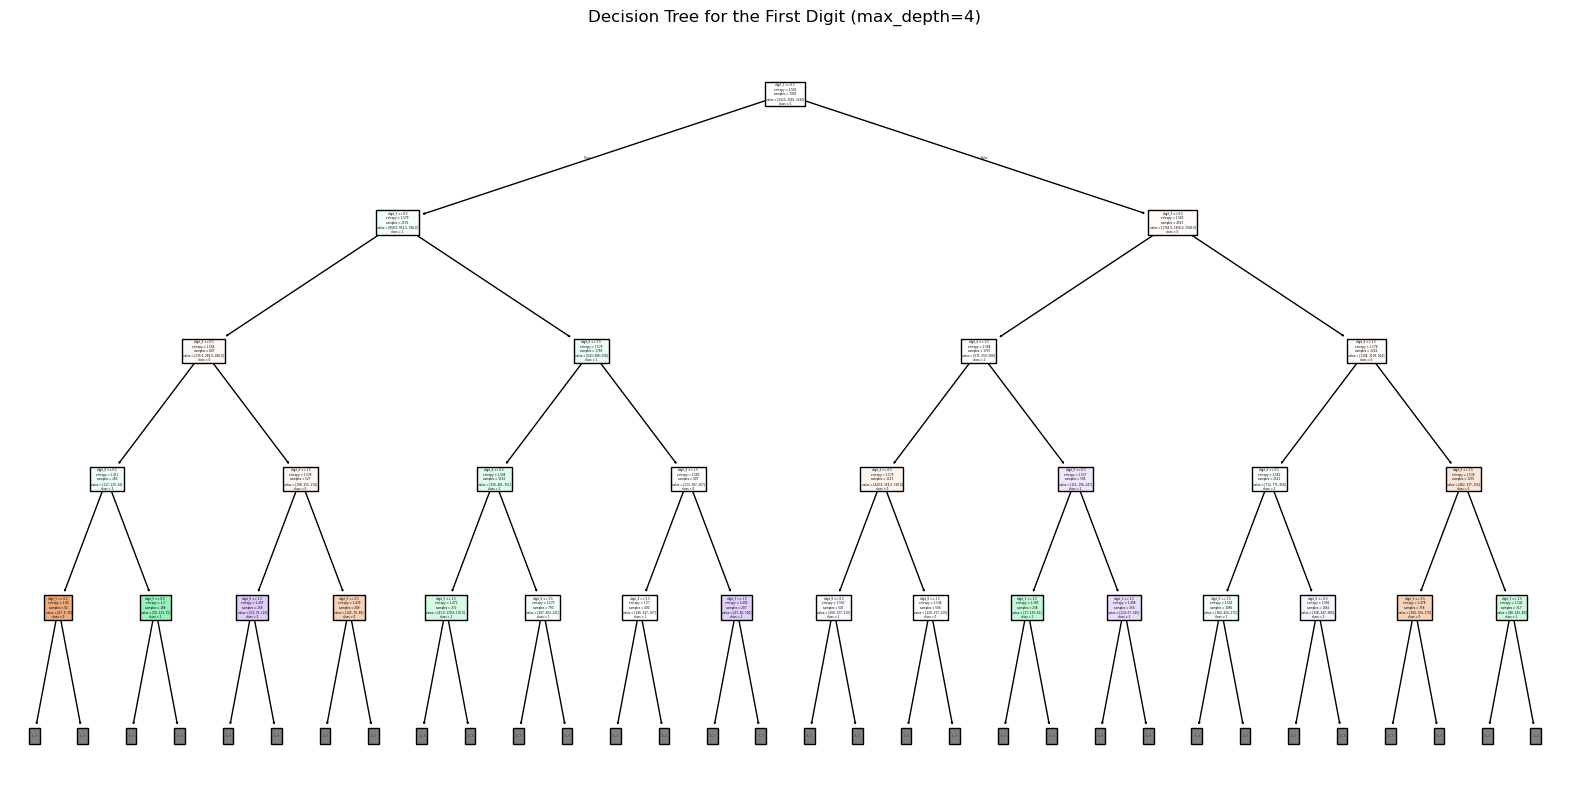

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Instantiate a Decision Tree Classifier with the best hyperparameters
best_dtc = DecisionTreeClassifier(
    max_depth=best_result['max_depth'],
    min_samples_split=best_result['min_samples_split'],
    min_samples_leaf=best_result['min_samples_leaf'],
    criterion=best_result['criterion'],
    random_state=0
)

# Train the model on the full training data
# Since y_train is multi-output, we can't directly plot a single tree for all outputs.
# Let's train and plot a tree for the first digit position (index 0).
best_dtc.fit(X_train, [y[0] for y in y_train])

# Visualize the trained Decision Tree
plt.figure(figsize=(20, 10)) # Adjust figure size for better visibility
plot_tree(best_dtc, max_depth=4, filled=True, feature_names=[f'digit_{i}' for i in range(len(X_train[0]))], class_names=[str(i) for i in range(3)])
plt.title("Decision Tree for the First Digit (max_depth=4)")
plt.show()

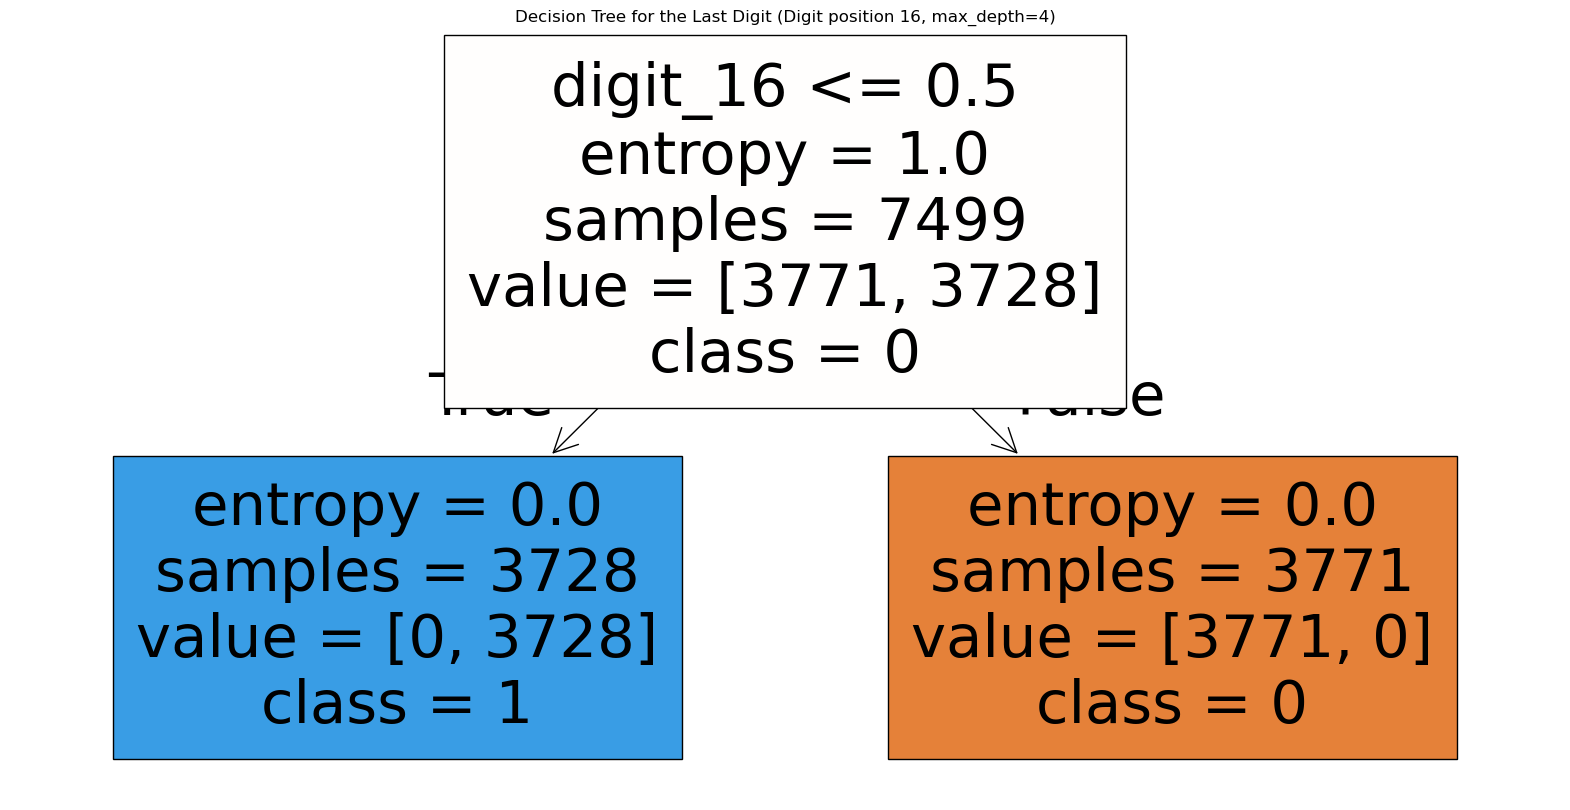

In [ ]:
# Let's visualize the tree for the last digit position (index 16), where accuracy was high.
last_digit_index = len(X_train[0]) - 1

last_digit_dtc = DecisionTreeClassifier(
    max_depth=best_result['max_depth'],
    min_samples_split=best_result['min_samples_split'],
    min_samples_leaf=best_result['min_samples_leaf'],
    criterion=best_result['criterion'],
    random_state=0
)

# Train the model for the last digit position
last_digit_dtc.fit(X_train, [y[last_digit_index] for y in y_train])

# Visualize the trained Decision Tree for the last digit
plt.figure(figsize=(20, 10)) # Adjust figure size for better visibility
plot_tree(last_digit_dtc, max_depth=4, filled=True, feature_names=[f'digit_{i}' for i in range(len(X_train[0]))], class_names=[str(i) for i in range(3)])
plt.title(f"Decision Tree for the Last Digit (Digit position {last_digit_index}, max_depth=4)")
plt.show()

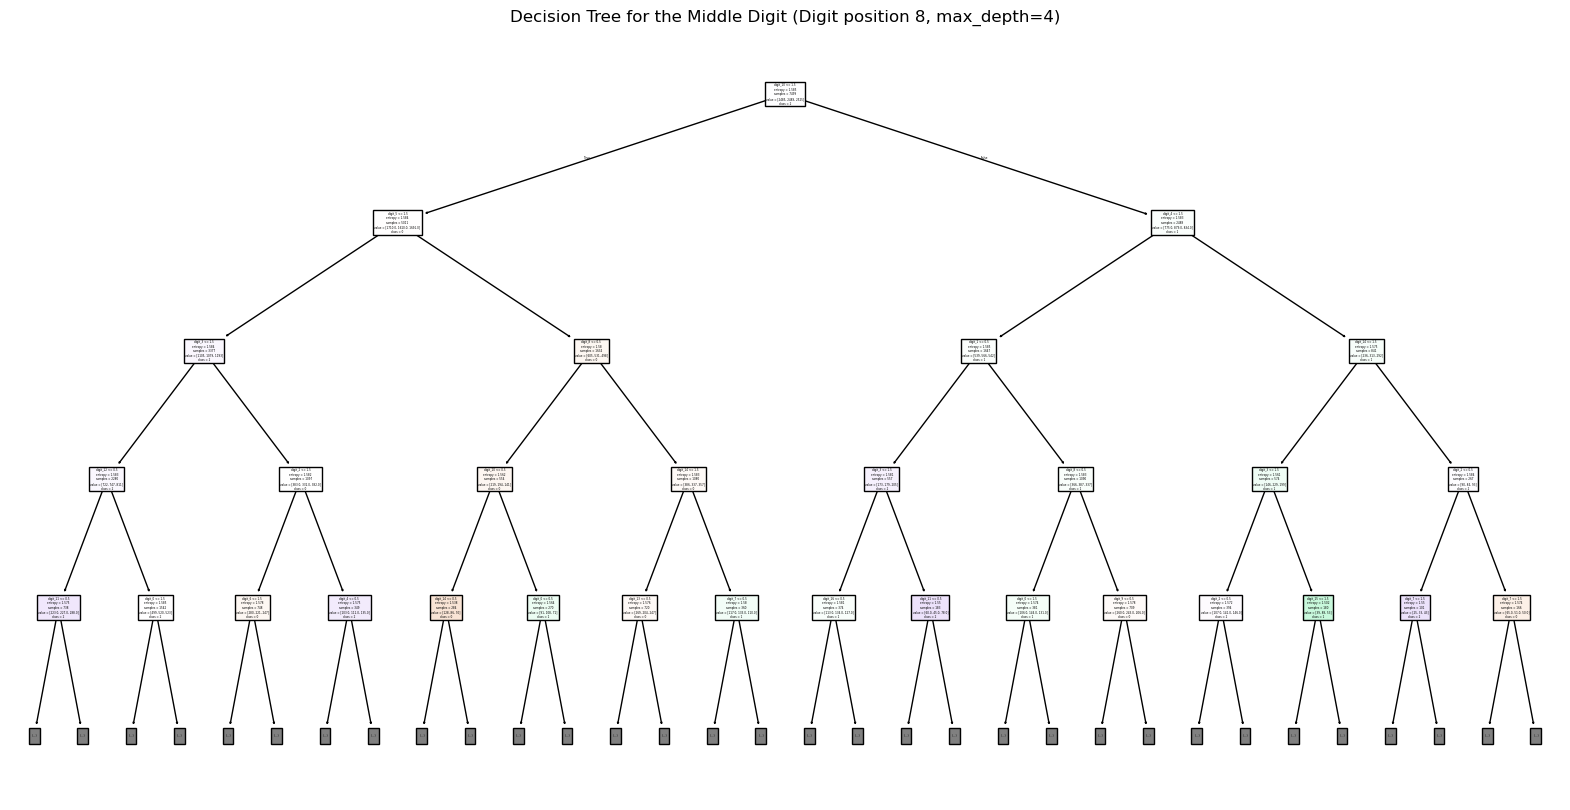

In [ ]:
# Let's visualize the tree for a digit position in the middle, e.g., index 8.
middle_digit_index = len(X_train[0]) // 2

middle_digit_dtc = DecisionTreeClassifier(
    max_depth=best_result['max_depth'],
    min_samples_split=best_result['min_samples_split'],
    min_samples_leaf=best_result['min_samples_leaf'],
    criterion=best_result['criterion'],
    random_state=0
)

# Train the model for the middle digit position
middle_digit_dtc.fit(X_train, [y[middle_digit_index] for y in y_train])

# Visualize the trained Decision Tree for the middle digit
plt.figure(figsize=(20, 10)) # Adjust figure size for better visibility
plot_tree(middle_digit_dtc, max_depth=4, filled=True, feature_names=[f'digit_{i}' for i in range(len(X_train[0]))], class_names=[str(i) for i in range(3)])
plt.title(f"Decision Tree for the Middle Digit (Digit position {middle_digit_index}, max_depth=4)")
plt.show()

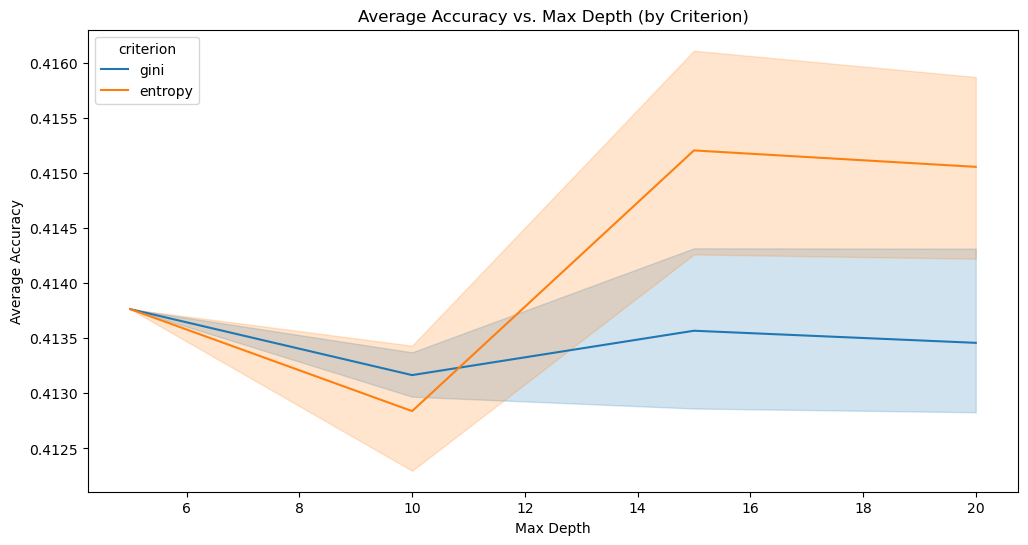

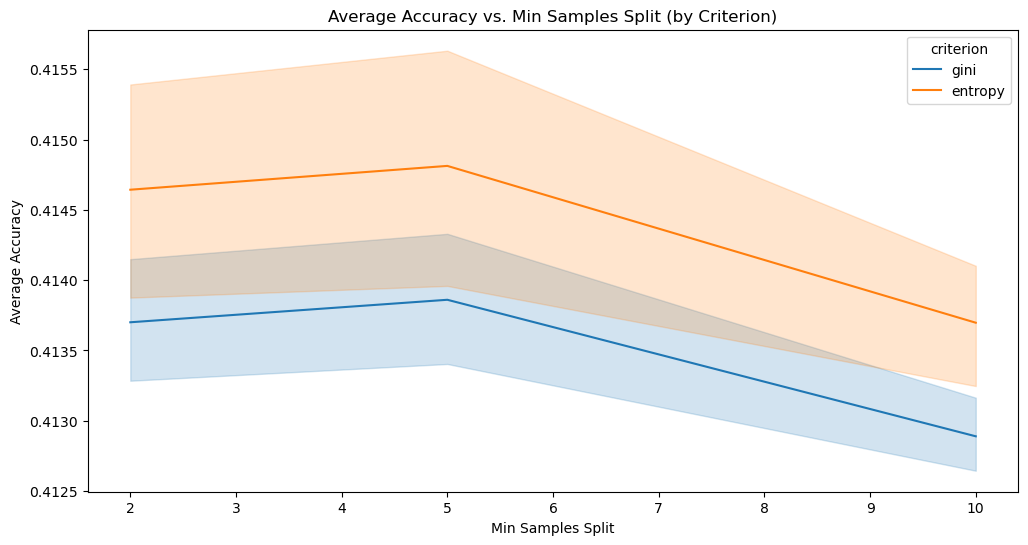

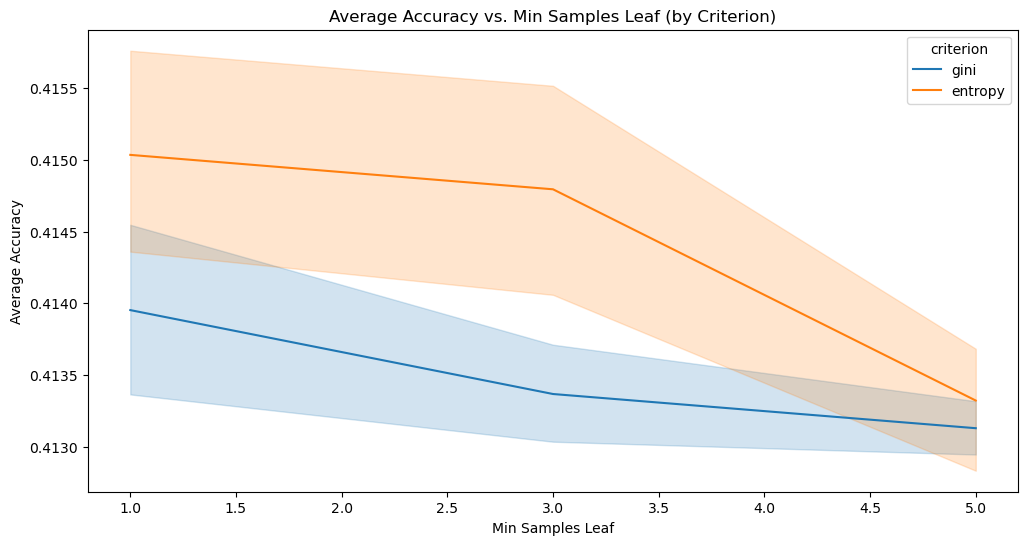

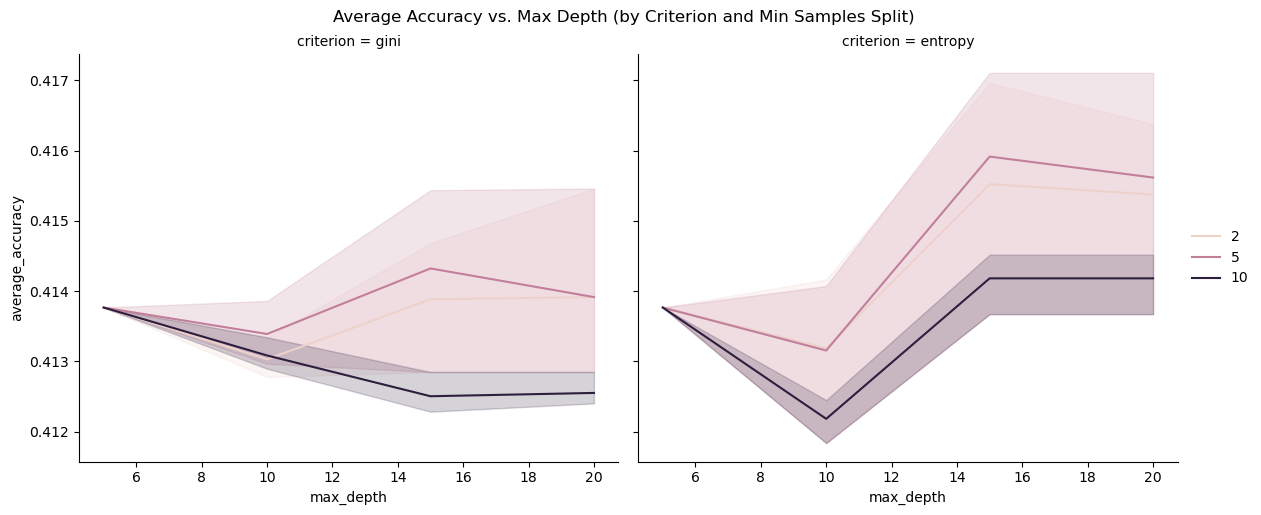

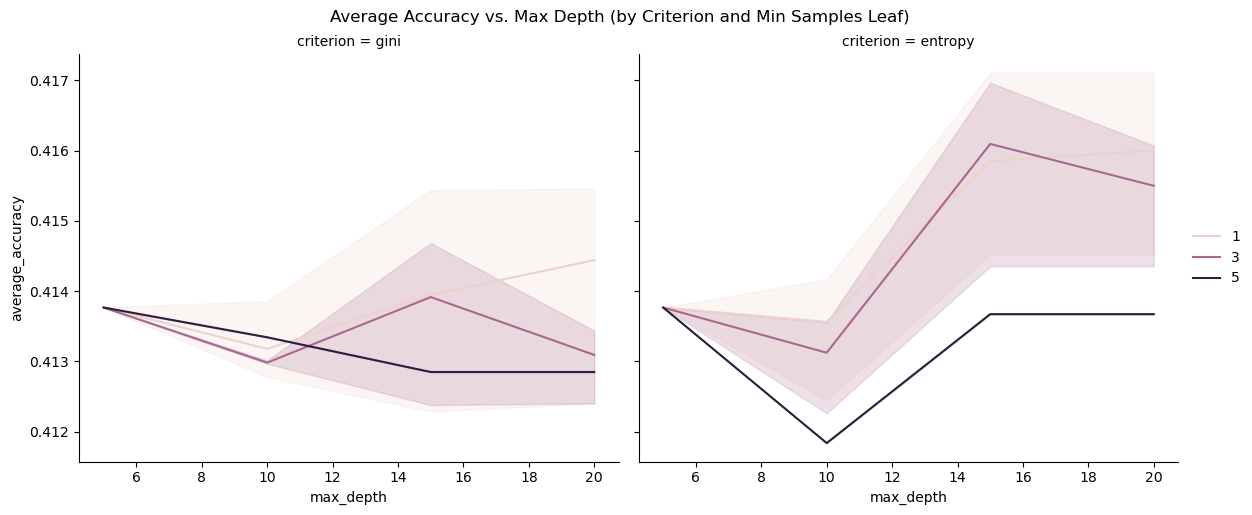

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the tuning_results list to a pandas DataFrame
tuning_df = pd.DataFrame(tuning_results)

# Plot average accuracy vs. max_depth, with hue for criterion
plt.figure(figsize=(12, 6))
sns.lineplot(data=tuning_df, x='max_depth', y='average_accuracy', hue='criterion')
plt.title('Average Accuracy vs. Max Depth (by Criterion)')
plt.xlabel('Max Depth')
plt.ylabel('Average Accuracy')
plt.show()

# Plot average accuracy vs. min_samples_split, with hue for criterion
plt.figure(figsize=(12, 6))
sns.lineplot(data=tuning_df, x='min_samples_split', y='average_accuracy', hue='criterion')
plt.title('Average Accuracy vs. Min Samples Split (by Criterion)')
plt.xlabel('Min Samples Split')
plt.ylabel('Average Accuracy')
plt.show()

# Plot average accuracy vs. min_samples_leaf, with hue for criterion
plt.figure(figsize=(12, 6))
sns.lineplot(data=tuning_df, x='min_samples_leaf', y='average_accuracy', hue='criterion')
plt.title('Average Accuracy vs. Min Samples Leaf (by Criterion)')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Average Accuracy')
plt.show()

# Plot average accuracy vs. max_depth, with col for criterion and hue for min_samples_split
g = sns.FacetGrid(tuning_df, col='criterion', height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x='max_depth', y='average_accuracy', hue='min_samples_split')
g.add_legend()
g.fig.suptitle('Average Accuracy vs. Max Depth (by Criterion and Min Samples Split)', y=1.02)
plt.show()

# Plot average accuracy vs. max_depth, with col for criterion and hue for min_samples_leaf
g = sns.FacetGrid(tuning_df, col='criterion', height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x='max_depth', y='average_accuracy', hue='min_samples_leaf')
g.add_legend()
g.fig.suptitle('Average Accuracy vs. Max Depth (by Criterion and Min Samples Leaf)', y=1.02)
plt.show()

# Conclusion

### Summary of Hyperparameter Tuning and Performance
The hyperparameter tuning experiments explored the impact of `max_depth`, `min_samples_split`, `min_samples_leaf`, and `criterion` on the average accuracy of the Decision Tree Classifier in predicting the next digits of the LCG sequence.
The best performing combination found was: {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'entropy', 'average_accuracy': np.float64(0.4171058823529412)}
Looking at the performance plots:
- There was only a minor variation in average accuracy across most hyperparameter settings. The highest average accuracy achieved was around 41.7%, which is only slightly better than random guessing (33.3% for 3 classes).
- The `criterion` (gini or entropy) had a minimal impact on the average accuracy.
- Increasing `max_depth` beyond a certain point (around 5-10) did not significantly improve average accuracy, and in some cases, it slightly decreased, suggesting potential overfitting or simply that deeper trees couldn't find stronger patterns.
- Similarly, varying `min_samples_split` and `min_samples_leaf` within the tested ranges had little noticeable effect on the average accuracy.
Overall, the hyperparameter tuning suggests that the average predictability of the LCG sequence digits, as measured by Decision Tree accuracy, is low and not highly sensitive to these common tree hyperparameters.

### Analysis of Decision Tree Visualizations and LCG Quality
The visualizations of the Decision Trees for different digit positions offer insights:
- For the last digit position (index 16), the Decision Tree achieved perfect accuracy (100%). The tree structure, even at a limited depth, likely captures a strong, deterministic relationship between the input features (previous digits) and the next last digit. This high predictability for the last digit indicates a significant lack of randomness in the LCG's generation of the last digit.
- For the first digit position (index 0) and middle digit position (index 8), the accuracy was much lower (around 30-40%). The tree structures for these digits appear more complex and less deterministic within the limited depth shown, reflecting the lower predictability. However, even a small improvement over random guessing suggests some underlying patterns are being detected.
- The stark contrast in predictability between the last digit and the earlier digits is a critical finding. A truly random sequence should exhibit similar unpredictability across all 'digits' or components of the generated numbers.

### Conclusion and Recommendations
Based on the Decision Tree analysis, the Linear Congruential Generator with the chosen parameters (Modulus=123456789, A=101, C=13, Seed=321) does not appear to be a high-quality pseudo-random number generator, especially when considering the base-3 representation of the numbers.
The perfect predictability of the last digit in the base-3 representation is a significant weakness and demonstrates a clear pattern that can be exploited. This suggests that the lower-order bits of the generated numbers are highly predictable.
While the earlier digits show lower predictability, the overall average accuracy is still low, indicating that the Decision Trees struggle to find strong, consistent patterns in the sequence as a whole.
Recommendations:
- For applications requiring high-quality randomness, this specific LCG with these parameters should be avoided, particularly if the lower-order bits are used directly.
- To potentially improve the randomness, consider using different LCG parameters that satisfy known conditions for longer periods and better statistical properties (e.g., Hull-Dobell Theorem).
- Other, more sophisticated PRNG algorithms (e.g., Mersenne Twister) should be considered for applications where strong randomness is critical.
- Further analysis could involve testing the predictability of other parts of the number representation (e.g., middle bits) and using other statistical tests for randomness (e.g., Diehard tests).
